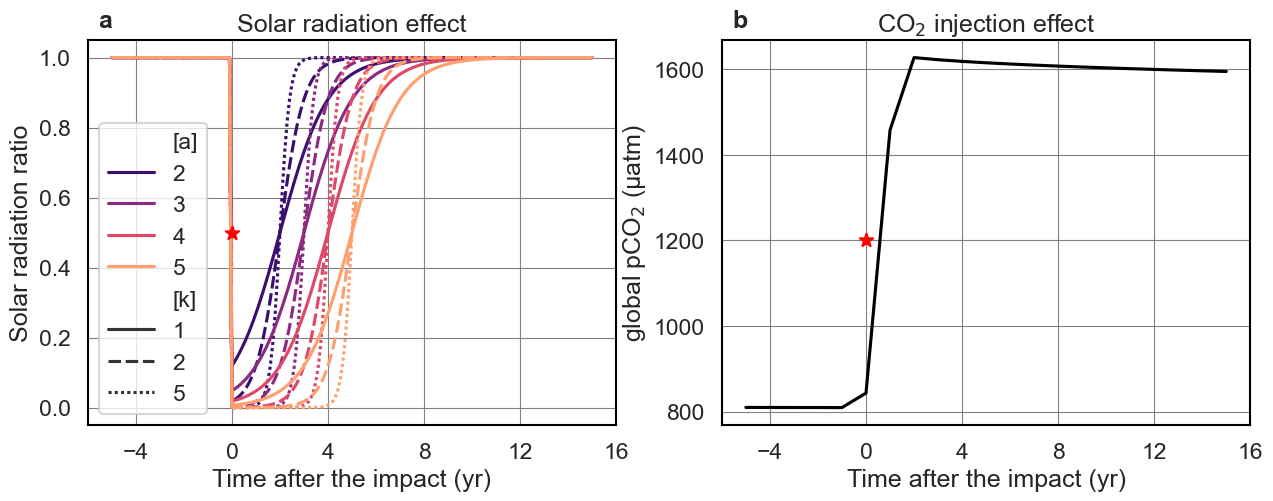

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the logistic function
def logistic(x, l=1, k=1, a=0):
    exponent = -k * (x - a)
    y = l / (1 + np.exp(exponent))
    return y

a_samples = [2, 3, 4, 5]
k_sample = [1, 2, 5]

data = []
for a in a_samples:
    for k in k_sample:
        x1 = np.arange(0, 15.1, 0.1)
        y1 = logistic(x1, k=k, a=a)
        d_tmp = pd.DataFrame({'x': x1, 'y': y1, '[a]': a, '[k]': k})

        # Add the additional data where x is in the range -10 to 0 and y is constant at 1
        x2 = np.arange(-5, 0, 0.1)
        y2 = np.ones_like(x2)  # Create an array of ones with the same length as x2
        d_additional = pd.DataFrame({'x': x2, 'y': y2, '[a]': a, '[k]': k})

        # Concatenate the additional data to the existing data
        d_tmp = pd.concat([d_tmp, d_additional], ignore_index=True)
        data.append(d_tmp)

df = pd.concat(data, ignore_index=True)

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Visualize the data with seaborn
fig, axs = plt.subplots(figsize=(15, 5), ncols=2)

## style format
for ax in axs:
    ax.grid(True, linestyle='-', linewidth=.8, color='gray')
    ax.set_xticks(np.arange(-8, 18, step=4))
    for pos in ax.spines:
        ax.spines[pos].set_color('black')
        ax.spines[pos].set_linewidth(1.5)

#palette = sns.color_palette("mako_r", 4)
palette = sns.color_palette("magma", 4)
sns.lineplot(data=df, x='x', y='y', hue='[a]',style='[k]', ax=axs[0], palette=palette)
## remove legend box outlines
axs[0].legend(frameon=True)

from cgeniepy.model import GenieModel
model = GenieModel("../model/muffin.u067bc.PO4.8P8Z.EXP2")
df_co2 = model.get_ts("biogem_series_atm_pCO2.res")
df_co2['global pCO2 (μatm)'] = df_co2['global pCO2 (atm)'] * 1E6

## impact starts from 101 year
df_co2[' time (yr)'] = df_co2[' time (yr)'] - 100
df_co2 = df_co2[(df_co2[' time (yr)'] >= -5) & (df_co2[' time (yr)'] <= 15)]

sns.lineplot(data=df_co2, x=' time (yr)', y='global pCO2 (μatm)', ax=axs[1], color='k')

axs[0].set_xlabel('Time after the impact (yr)')
axs[0].set_ylabel('Solar radiation ratio')
axs[0].scatter(0, 0.5, marker='*', color='red', s=100, zorder=3)

axs[1].set_xlabel('Time after the impact (yr)')
axs[1].set_ylabel(r"global pCO$_{2}$ (μatm)")
axs[1].scatter(0, 1200, marker='*', color='red', s=100, zorder=3)

axs[0].set_title("Solar radiation effect")
axs[1].set_title(r"CO$_{2}$ injection effect")

axs[0].text(0.02, 1.08, 'a', transform=axs[0].transAxes, weight='bold',va='top')
axs[1].text(0.02, 1.08, 'b', transform=axs[1].transAxes,weight='bold', va='top')
        
fig.savefig("../output/fig2.png", dpi=400, bbox_inches='tight')